<h1>Exploring Logistic Regression</h1>

Text(0, 0.5, 'sigmoid(x)')

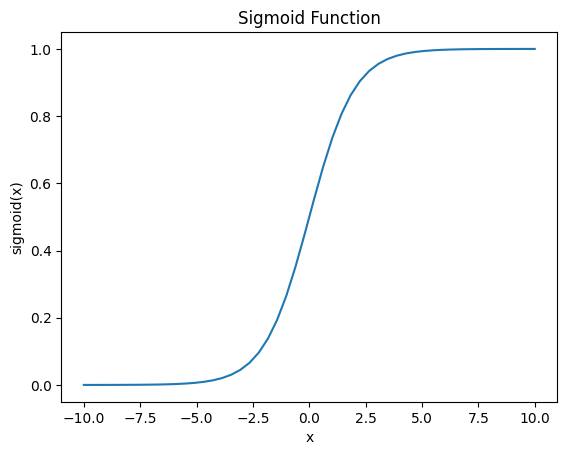

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

x = np.linspace(-10,10,50)

def sigmoid(z):
    return 1/(1+np.exp(-z))

plt.plot(x,sigmoid(x))
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')


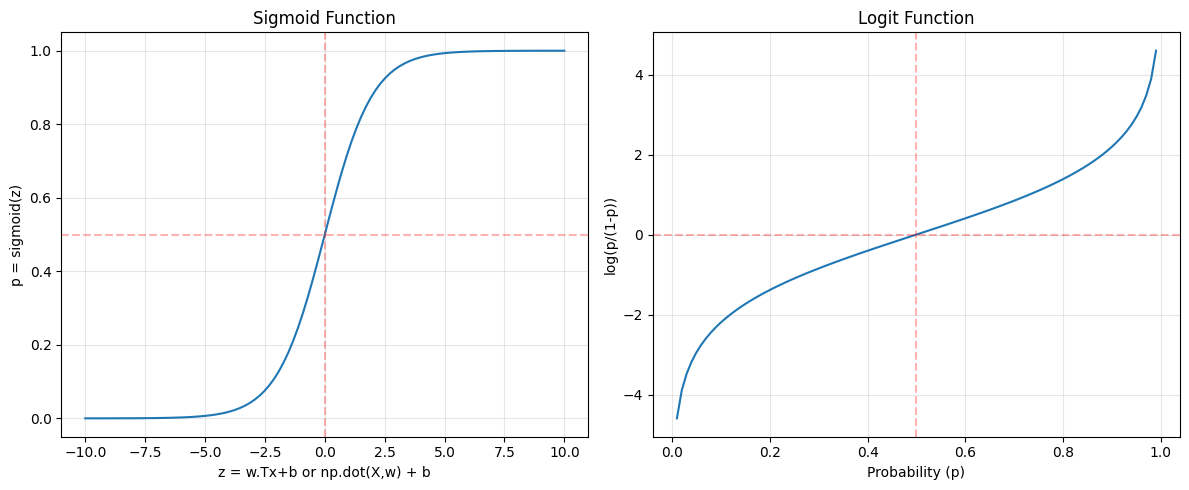

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Sigmoid function
x = np.linspace(-10, 10, 100)
sigmoid = 1/(1+np.exp(-x))

ax1.plot(x, sigmoid)
ax1.set_title('Sigmoid Function')
ax1.set_xlabel('z = w.Tx+b or np.dot(X,w) + b')
ax1.set_ylabel('p = sigmoid(z)')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
ax1.axvline(x=0, color='r', linestyle='--', alpha=0.3)

# Plot 2: Logit function 
p = np.linspace(0.01, 0.99, 100) 
logit = np.log(p/(1-p))

ax2.plot(p, logit)
ax2.set_title('Logit Function')
ax2.set_xlabel('Probability (p)')
ax2.set_ylabel('log(p/(1-p))')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.3)
ax2.axvline(x=0.5, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

<h1>Visualize the Loss of classifying a single training point</h1>

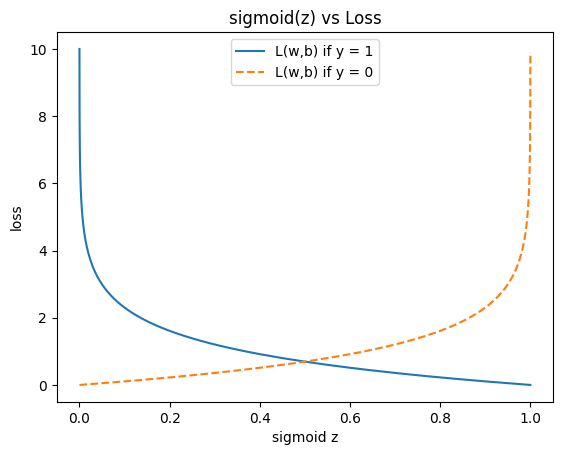

In [24]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))

def loss_1(z):
    return (-1 * np.log(sigmoid(z)))
def loss_2(z):
    return (-1*np.log(1-sigmoid(z)))

z_vals = np.arange(-10,10,0.1)

#v1 values for loss1
#v2 values for loss2
sigmoid_z = sigmoid(z_vals)
v1 = [loss_1(z) for z in z_vals]
v2 = [loss_2(z) for z in z_vals]

plt.plot(sigmoid_z,v1,label = 'L(w,b) if y = 1')
plt.plot(sigmoid_z,v2,label = 'L(w,b) if y = 0',linestyle = '--')
plt.title('sigmoid(z) vs Loss')
plt.xlabel('sigmoid z')
plt.ylabel('loss')
plt.legend(loc = 'best')
plt.show()



<h1>Implement Logistic Regression GD <h1>

In [25]:
class LogisticRegressionGD:
    def __init__(self,epochs,eta,random_state):
        self.epochs = epochs
        self.eta = eta
        self.random_state = random_state
    
    def fit(self,X,y):

        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01,size = X.shape[1])
        self.b = float(0.0)
        self.losses = []

        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation_function(net_input)
            errors = (y-output)
            self.w += self.eta * 2.0 * (X.T @ errors)/(X.shape[0])
            self.b += self.eta * 2.0 * np.mean(errors)
            loss = (-y @ np.log(output) - (1-y) @ np.log(1 - output)) / len(y)
            self.losses.append(loss)
            
        return self

    def predict(self,X):
        return np.where(self.activation_function(self.net_input(X))>0.5,1,0)

    def net_input(self,X):
        return (X @ self.w) + self.b
    
    def activation_function(self,z):
        return 1/(1+np.exp(-1*z))

<h1> Load and standardize Data for testing </h1>

In [26]:
from sklearn.model_selection import train_test_split
iris_data = pd.read_csv('/Users/shivvinnybhutani/LocalShiv/Projects/ML_Python/iris_data.csv', header = 0 , encoding='utf-8')
y = iris_data.iloc[0:100,4].values
y = np.where(y == 'Setosa',0,1)
X = iris_data.iloc[0:100,[2,3]].values

X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - np.mean(X_std[:,0])) / np.std(X_std[:,0])
X_std[:,1] = (X_std[:,1] - np.mean(X_std[:,1])) / np.std(X_std[:,1])

X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size = 0.3 , random_state = 42 , stratify = y)

<h1>Plotting Function<h1>

In [27]:
def plot_descision_boundaries(X_std,y,classifier):
    color = ['b','g']
    markers = ('o', 's')

    for idx , cls in enumerate(np.unique(y)):
        x0 = X_std[(y == cls), 0]
        x1 = X_std[(y == cls), 1]
        plt.scatter(
            x0,
            x1,
            c = color[idx],
            marker = markers[idx],
            label = cls
        )
    x0_min , x0_max = X_std[:,0].min() - 1 , X_std[:,0].max() + 1
    x1_min , x1_max = X_std[:,1].min() - 1 , X_std[:,1].max() + 1
    """
    x0 = petal_length
    x1 = petal_width
    0 = x0 * w0 + x1 * w1 + b -> to get x1 as our y in a 2d_plane:
    x1 = -1*(x0*w0 + b / w[1])
    """
    y0 = -(x0_min * classifier.w[0] + classifier.b) / classifier.w[1] 
    y1 = -(x0_max * classifier.w[0] + classifier.b) / classifier.w[1]

    plt.plot([x0_min,x0_max],[y0,y1],'k--',lw = 1,label = 'Descision Boundary')
    plt.xlim(x0_min, x0_max)
    plt.ylim(x1_min, x1_max)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Witdh')
    plt.legend(loc='upper left')


<h1>Fit Model and Plot data </h1>

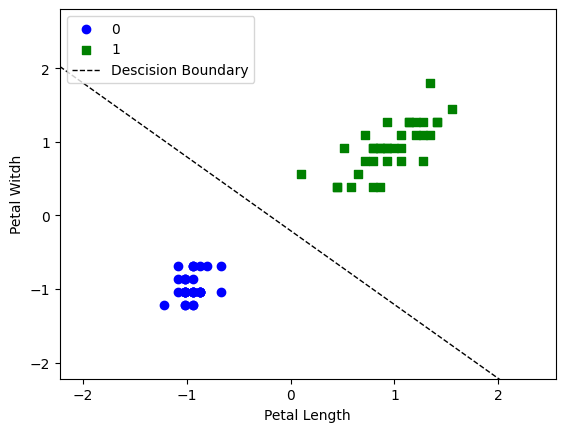

In [28]:
logistic_gd = LogisticRegressionGD(epochs= 1000,eta=0.3,random_state=1)
logistic_gd.fit(X_train,y_train)
plot_descision_boundaries(X_std=X_train, y=y_train, classifier= logistic_gd)

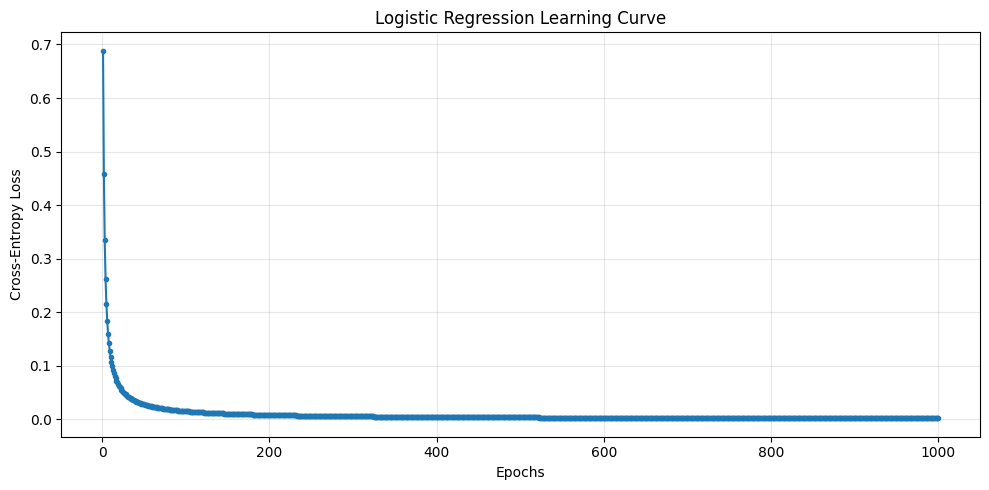

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(logistic_gd.losses) + 1), logistic_gd.losses, marker='o', markersize=3)
plt.title('Logistic Regression Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression 

logistic_regresison = LogisticRegression(C = 100, solver = 'lbfgs', multi_class='ovr')
logistic_regresison.fit(X_train,y_train)
#plot_descision_boundaries(X_std,y,classifier=logistic_regresison) Sklearn logistic regression implementation has no w or b to use for plotting.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100, multi_class='ovr')

In [31]:
logistic_regresison.predict_proba(X_std[:3,:])

array([[9.99663479e-01, 3.36520700e-04],
       [9.99663479e-01, 3.36520700e-04],
       [9.99752941e-01, 2.47058855e-04]])

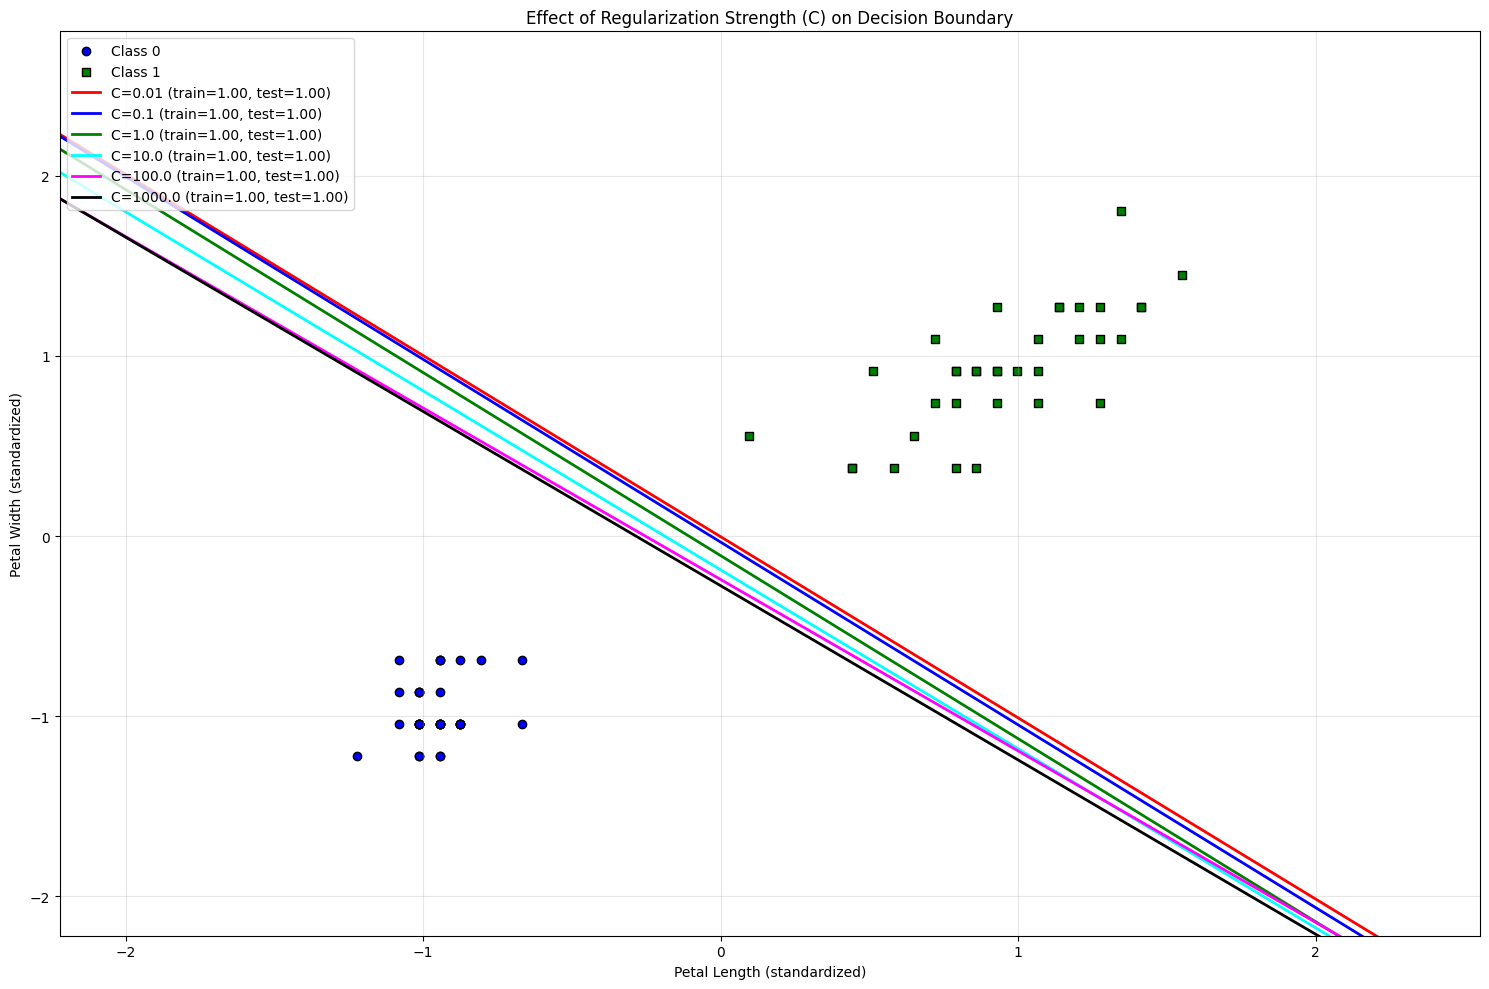

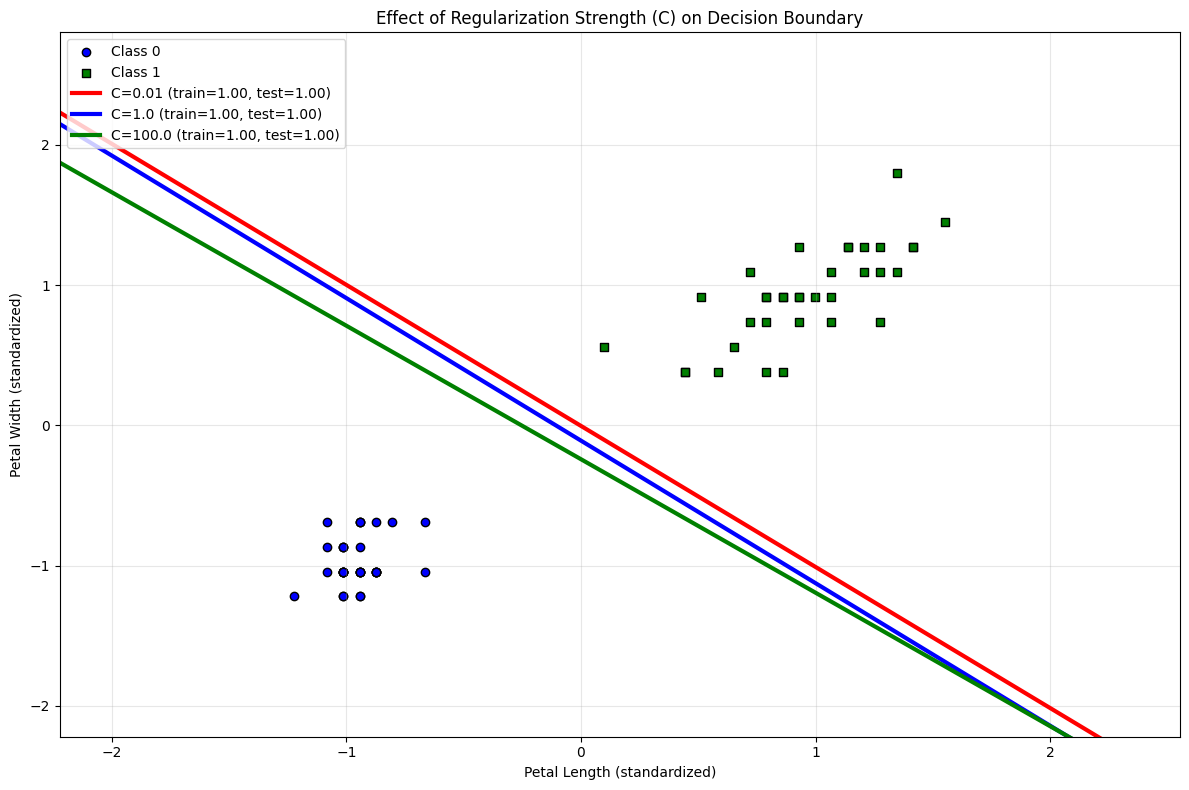

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create a figure to plot multiple decision boundaries
plt.figure(figsize=(15, 10))

# Different values of C to try
C_values = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'black']

# Function to extract coefficients and convert to decision boundary
def get_sklearn_decision_boundary(model, x_min, x_max):
    # Extract coefficients
    coef = model.coef_[0]
    intercept = model.intercept_[0]
    
    # Calculate decision boundary points
    # w0*x0 + w1*x1 + b = 0 => x1 = (-w0*x0 - b)/w1
    x0_points = np.array([x_min, x_max])
    x1_points = (-coef[0] * x0_points - intercept) / coef[1]
    return x0_points, x1_points

# Plot the training data points
for idx, cls in enumerate(np.unique(y_train)):
    plt.scatter(
        X_train[(y_train == cls), 0],
        X_train[(y_train == cls), 1],
        c=['b', 'g'][idx],
        marker=['o', 's'][idx],
        edgecolors='k',
        label=f'Class {cls}'
    )

# Determine plot limits
x0_min, x0_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x1_min, x1_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Train models with different C values and plot their decision boundaries
for i, c in enumerate(C_values):
    # Train the model with the current C value
    model = LogisticRegression(C=c, solver='liblinear', random_state=42)
    model.fit(X_train, y_train)
    
    # Get accuracy score
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Get decision boundary
    x0_points, x1_points = get_sklearn_decision_boundary(model, x0_min, x0_max)
    
    # Plot the decision boundary
    plt.plot(x0_points, x1_points, color=colors[i], linestyle='-', 
             linewidth=2, label=f'C={c} (train={train_score:.2f}, test={test_score:.2f})')

plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.title('Effect of Regularization Strength (C) on Decision Boundary')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Also plot a smaller set with just 3 key values for clarity
plt.figure(figsize=(12, 8))
key_C_values = [0.01, 1.0, 100.0]
key_colors = ['red', 'blue', 'green']

# Plot the training data points
for idx, cls in enumerate(np.unique(y_train)):
    plt.scatter(
        X_train[(y_train == cls), 0],
        X_train[(y_train == cls), 1],
        c=['b', 'g'][idx],
        marker=['o', 's'][idx],
        edgecolors='k',
        label=f'Class {cls}'
    )

# Train models with different C values and plot their decision boundaries
for i, c in enumerate(key_C_values):
    # Train the model with the current C value
    model = LogisticRegression(C=c, solver='liblinear', random_state=42)
    model.fit(X_train, y_train)
    
    # Get accuracy score
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Get decision boundary
    x0_points, x1_points = get_sklearn_decision_boundary(model, x0_min, x0_max)
    
    # Plot the decision boundary
    plt.plot(x0_points, x1_points, color=key_colors[i], linestyle='-', 
             linewidth=3, label=f'C={c} (train={train_score:.2f}, test={test_score:.2f})')

plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.title('Effect of Regularization Strength (C) on Decision Boundary')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()